In [186]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

In [189]:
stemmer = PorterStemmer()
sw = stopwords.words('english')

In [190]:
df = pd.read_excel('pySearchTerms.xlsx')

In [237]:
df.head(10)

,SearchTerm
0,size
1,tax invoice
2,template
3,shipping
4,payment
5,invoice
6,colour
7,delivery
8,spot uv
9,background colour


In [193]:
# removing punctuation from search terms ('.', ',' ect)
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [194]:
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: remove_punctuation(x))

In [195]:
df['SearchTerm']

0                                                    size
1                                             tax invoice
2                                                template
3                                                shipping
4                                                 payment
                              ...                        
4995    how do i add documents to my website for download
4996           how do i add embossing to my business card
4997                        how do i add express checkout
4998            how do i add express shipping to my order
4999    how do i add eyelets and make this an outdoor ...
Name: SearchTerm, Length: 5000, dtype: object

In [196]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [197]:
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [198]:
df['SearchTerm']

0                                                  [size]
1                                          [tax, invoice]
2                                              [template]
3                                              [shipping]
4                                               [payment]
                              ...                        
4995    [how, do, i, add, documents, to, my, website, ...
4996    [how, do, i, add, embossing, to, my, business,...
4997                 [how, do, i, add, express, checkout]
4998    [how, do, i, add, express, shipping, to, my, o...
4999    [how, do, i, add, eyelets, and, make, this, an...
Name: SearchTerm, Length: 5000, dtype: object

In [199]:
def remove_stopwords(text):
    words =  [w for w in text if w not in stopwords.words('english')]
    return words

In [200]:
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: remove_stopwords(x))

In [201]:
df['SearchTerm']

0                                      [size]
1                              [tax, invoice]
2                                  [template]
3                                  [shipping]
4                                   [payment]
                        ...                  
4995      [add, documents, website, download]
4996         [add, embossing, business, card]
4997                 [add, express, checkout]
4998          [add, express, shipping, order]
4999    [add, eyelets, make, outdoor, banner]
Name: SearchTerm, Length: 5000, dtype: object

In [202]:
#stemmer = PorterStemmer()

In [203]:
#def word_stemmer(text):
#    stem_text = ' '.join([stemmer.stem(i) for i in text])
#    return stem_text

In [204]:
#df['SearchTerm'] = df['SearchTerm'].apply(lambda x: word_stemmer(x))
#df['SearchTerm']

In [205]:
#using WordNetLemmatizer this is not so agressiv as PorterStemmer
rom nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [206]:
def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [207]:
df['SearchTerm'] = df['SearchTerm'].apply(lambda x: word_lemmatizer(x))

In [208]:
df['SearchTerm']

0                                 size
1                          tax invoice
2                             template
3                             shipping
4                              payment
                     ...              
4995     add document website download
4996       add embossing business card
4997              add express checkout
4998        add express shipping order
4999    add eyelet make outdoor banner
Name: SearchTerm, Length: 5000, dtype: object

In [209]:
df

,SearchTerm
0,size
1,tax invoice
2,template
3,shipping
4,payment
...,...
4995,add document website download
4996,add embossing business card
4997,add express checkout
4998,add express shipping order


In [210]:
text = []
for i in df['SearchTerm']:
    text.append(i)

In [220]:
unique_string=(" ").join(text)

In [221]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

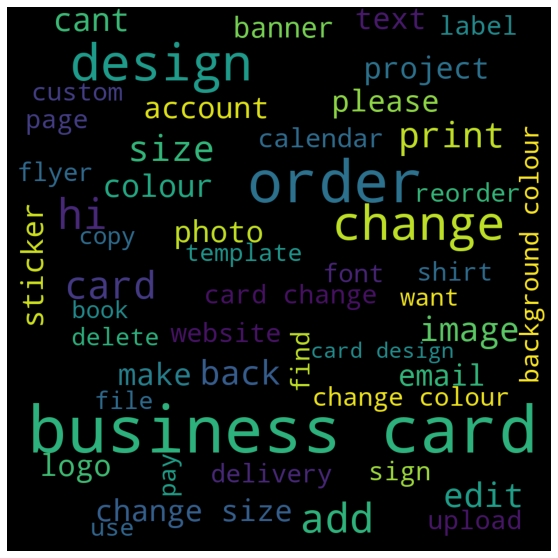

In [236]:
# show 50 words in the wordcloud
wordcloud = WordCloud(width=1000, height=1000, max_words=50).generate(unique_string)
plt.figure(figsize=(25,10))
# plot the WordCloud image 

plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [245]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [251]:
word_count = word_count(unique_string)

In [252]:
type(word_count)

dict

In [279]:
search_terms = pd.DataFrame(word_count.items())
search_terms.columns = ['search_term', 'count']
search_terms_top50 = search_terms.sort_values(['count'], ascending=False).reset_index(drop=True)
search_terms_top50.head(50)

,search_term,count
0,card,741
1,change,567
2,business,465
3,order,444
4,design,325
5,size,283
6,colour,251
7,add,235
8,hi,225
9,cant,147
